# # 그래프 가시화 정리

## - 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv', index_col='PassengerId')
train['Age'].fillna(train['Age'].mean(), inplace=True)
train20 = train.head(20)
train20.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


## - 라이브러리 설정

In [3]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.unicode_minus"] = False

from matplotlib import style
#style.use('ggplot')

## - matplotlib으로 그리기

### 라인플롯

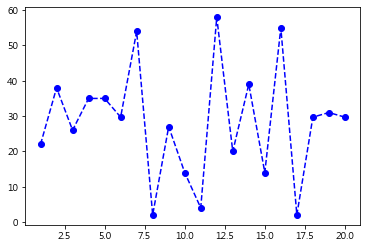

In [4]:
# x, y를 입력하여 그리기
plt.plot(train20.index, train20['Age'], 'bo--')

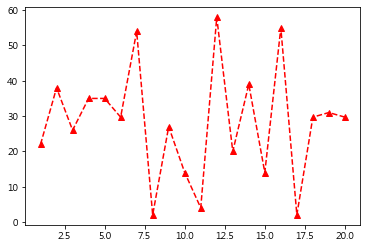

In [5]:
# x, y 대신에 Series(index 기준 value 값)로 그림
plt.plot(train20['Age'], 'r^--')

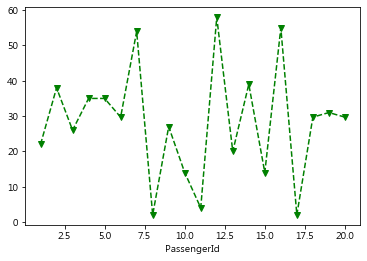

In [6]:
# Serise/DataFrame의 plot()
#train20['Age'].plot(color='b', marker='o', linestyle='--')
train20['Age'].plot(style='gv--')

### 플롯 꾸미기

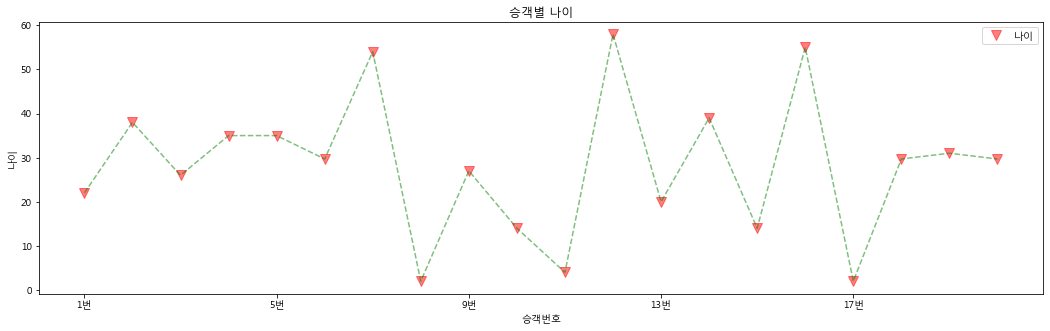

In [38]:
# pyplot(plt)의 경우 Line2D[] 객체를 반환함
# 크기변경1 : plt.figure를 사전 호출
# 크기변경2 : figure=에 plt.figure로 객체 전달
# 크기변경3 : Line2D[0].figure.set_size_inches로 조정
# 크기변경4 : fig, ax = plt.subplots(figsize=(18,5))
#plt.figure(figsize=(18, 5))
ax = plt.plot(train20['Age'], 'rv', train20['Age'], 'g--', markersize=10, alpha=0.5, figure=plt.figure(figsize=(18, 5)))
#ax[0].figure.set_size_inches(18,5)
plt.xticks(ticks=range(0,20, 4), labels=["1번", "5번", "9번", "13번", "17번"])
#plt.yticks(ticks=xxx, labels=xxx)
plt.xlabel('승객번호')
plt.ylabel('나이')
plt.title('승객별 나이')
plt.legend(['나이'], loc='best')

[0, 4, 8, 12, 16]

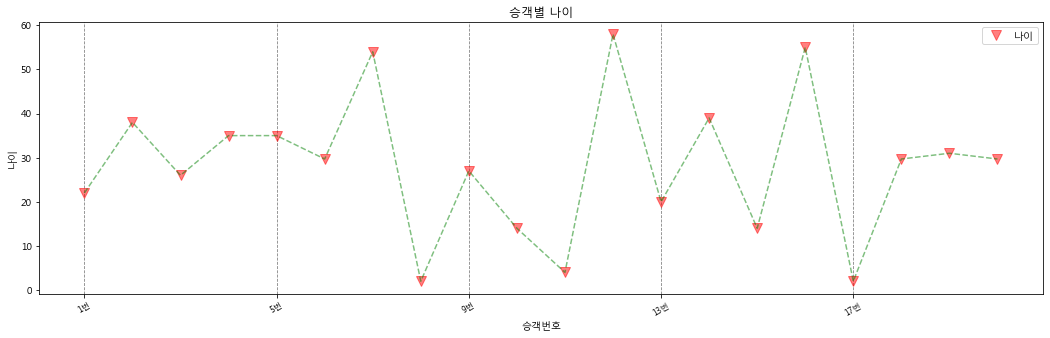

In [37]:
# DataFrame의 경우 AxesSubplot객체를 반환함
# AxesSubplot객체의 figure 혹은 set_XXX 함수로 꾸밈
# 팀: 동일한 데이터 2개에 대해 style을 다르게 주어 마커와 라인의 색을 다르게 줌

import matplotlib.ticker as ticker

ax = train20[['Age', 'Age']].plot(style=['rv', 'g--'], markersize=10, alpha=0.5, figsize=(18,5), label='Age')

#train20['Age'].plot(color='r', marker='v', markersize=10, linestyle='None', alpha=0.5, label='Age')
#ax = train20['Age'].plot(color='g', linestyle='--', label='Age')
#ax.figure.set_size_inches(18, 5)

ax.set_xticks(range(0,20, 4))
ax.set_xticklabels(["1번", "5번", "9번", "13번", "17번"], rotation=30, fontsize="small")
#ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,20, 6)))
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(range(1,21,6)))

ax.set_xlabel('승객번호')
ax.set_ylabel('나이')
ax.set_title('승객별 나이')
ax.legend(['나이'], loc='best')
ax.grid(axis='x', color='gray', linestyle='--')

list(range(0,20,4))

### 바플롯

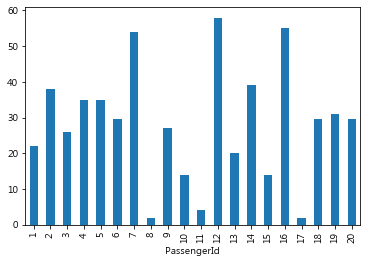

In [7]:
# kind=line/bar/barh
train20['Age'].plot(kind='bar')

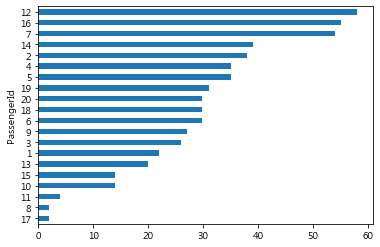

In [8]:
# 정렬과 barh
train20.sort_values(by='Age')['Age'].plot(kind='barh')

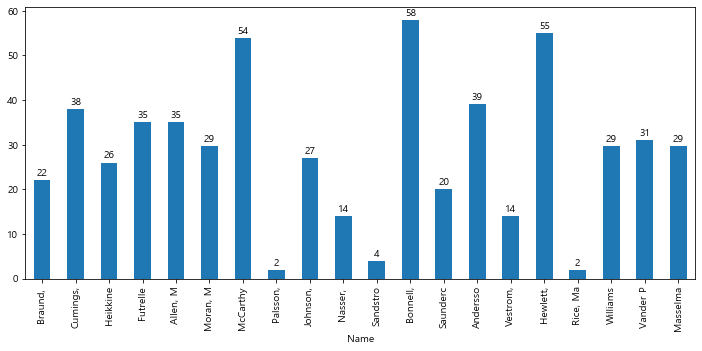

In [57]:
# [중요] index에 지정된 값으로 bar:xtick hbar:ytick 축 레이블이 생성됨
#plt.yticks(range(0, len(train20)), train20['Name'].str[:8])
train20.index = train20['Name'].str[:8]

ax = train20['Age'].plot.bar(figsize=(12,5))

# for i, rect in enumerate(ax.containers[0]):
#     ax.text(rect.get_x() + rect.get_width()/5*4, rect.get_height() + 1.5, str(train20['Age'].astype('int')[i]), ha='right', va='center')

for i, txt in enumerate(train20['Age'].astype('int')):
    ax.annotate(txt, (i, train20['Age'].values[i] + 1), ha='center')

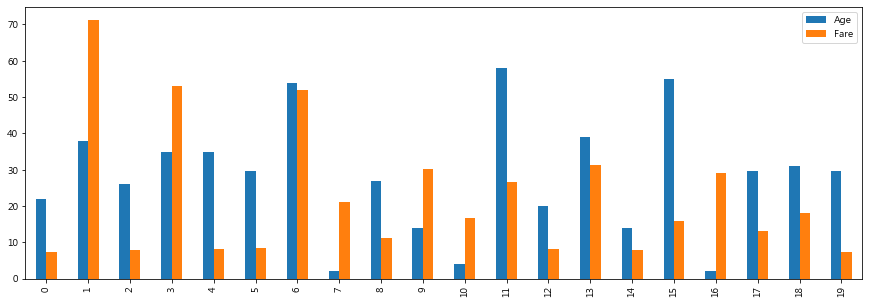

In [94]:
# kind=line, bar, barh
train20[['Age', 'Fare']].plot.bar(figsize=(15,5))

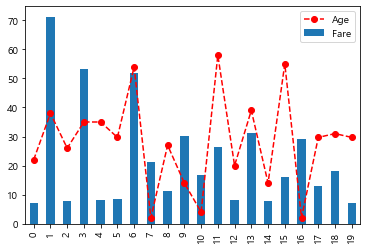

In [8]:
train20.index = range(0,20)

train20['Age'].plot(style='ro--')
train20['Fare'].plot(kind='bar')
plt.legend()

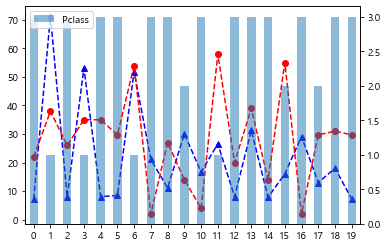

In [17]:
# twinx()로 다중축 구현
ax = train20['Fare'].plot(style='b^--')
ax = train20['Age'].plot(style='ro--', ax=ax)

ax1 = ax.twinx()
train20['Pclass'].plot(kind='bar', alpha=0.5, ax=ax1)
plt.legend()

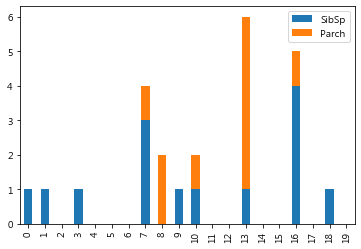

In [13]:
# stacked=True/False
train20[['SibSp', 'Parch']].plot(kind='bar', stacked=True)

### 파이챠트

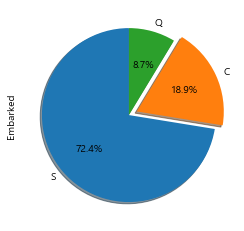

In [56]:
rt = train['Embarked'].value_counts()
df = pd.DataFrame(rt)

explode = (0.0, 0.1, 0.0)
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

df.plot.pie(y='Embarked', legend=False, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90) #, colors=colors)

In [51]:
rt

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 히스토그램

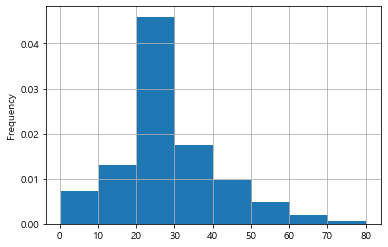

In [49]:
# 히스토그램(범위의 개수)
# density (True: 비율, False: 개수)
train['Age'].plot.hist(bins=8, grid=True, density=True)

### 산점도

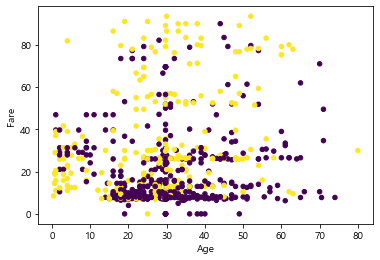

In [42]:
low_fare = train[train['Fare'] < 100]
low_fare.plot.scatter(x='Age', y='Fare', c='Survived', colormap='viridis', colorbar=False)

### 버블차트

In [39]:
bubble = pd.pivot_table(train, index=['Embarked', 'Sex'], values=['Fare']) #, aggfunc=[np.average])
bubble = bubble.reset_index()
bubble

,Embarked,Sex,Fare
0,C,female,75.169805
1,C,male,48.262109
2,Q,female,12.634958
3,Q,male,13.838922
4,S,female,38.740929
5,S,male,21.711996


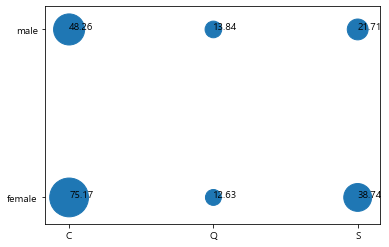

In [49]:
#bubble.plot.scatter(x='Embarked', y='Sex', s=bubble['Fare'])
plt.scatter(bubble['Embarked'], bubble['Sex'], s=bubble['Fare']*20)
for i, row in bubble.iterrows():
    plt.annotate(format(row['Fare'], '.2f'), (row['Embarked'], row['Sex']))

### 히트맵

In [36]:
train360 = train[(train['Age']>=30) & (train['Age']<60)]
heat = pd.pivot_table(train340, index=['Age'], columns=['Pclass'], values=['Survived'], aggfunc=[len]).fillna(0)
heat.columns = ['1등급', '2등급', '3등급']
heat.head()

,1등급,2등급,3등급
Age,,,
30.0,6.0,8.0,11.0
30.5,0.0,0.0,2.0
31.0,5.0,5.0,7.0
32.0,2.0,4.0,12.0
32.5,0.0,2.0,0.0


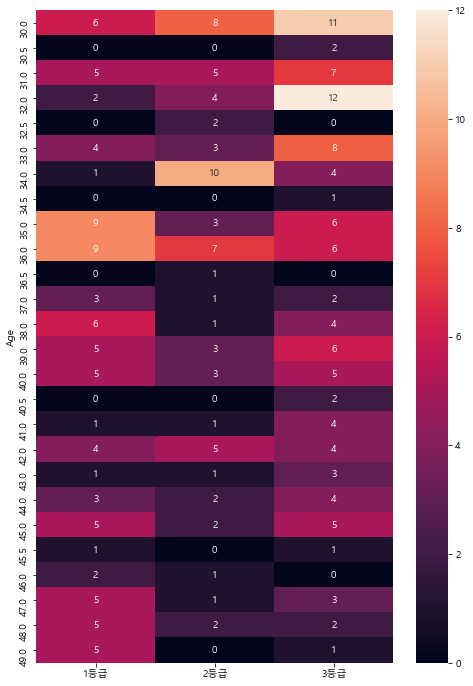

In [46]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 12))
sns.heatmap(heat, annot=True, ax=ax)

### 박스플롯(상자수염그림)

count    577.000000
mean      30.505824
std       13.009478
min        0.420000
25%       23.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

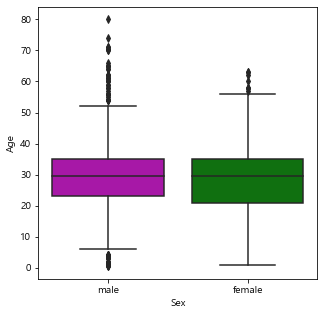

In [68]:
# 기술통계 (상자수염그림)
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=train, x='Sex', y='Age', palette=['m', 'g'])

train.loc[train['Sex']=='male', 'Age'].describe()

[Text(0, 0, '1'), Text(0, 0, '4'), Text(0, 0, '7'), Text(0, 0, '10')]

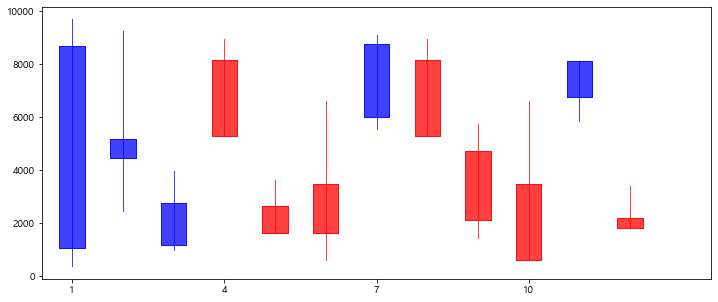

In [58]:
# 주가 박스플롯(시작, 상한, 하한, 종가)
import mpl_finance

ohlc = ohlc.head(10)

data = [[8685, 9685, 357, 1045],
        [5172, 9253, 2464, 4464],
        [2757, 3944, 968, 1168],
        [5271, 8955, 5271, 8160],
        [1636, 3625, 1636, 2625],
        [1606, 6607, 606, 3452],
        [8736, 9110, 5560, 6015],
        [5271, 8955, 5271, 8160],
        [2095, 5717, 1421, 4717],
        [606, 6607, 606, 3452],
        [8101, 8101, 5854, 6744],
        [1820, 3391, 1820, 2171]]

ohlc = pd.DataFrame(data, columns=['open', 'high', 'low', 'closed'],
                   index=pd.date_range(start='2018-01-01', end='2018-12-31', freq='MS', name='년월일'))

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, ohlc['open'], ohlc['high'], ohlc['low'], ohlc['closed'], width=0.5, colorup='r', colordown='b')

ax.set_xticks(range(0, 12, 3))
ax.set_xticklabels(range(1, 12, 3))

## - seaborn으로 쉽게 그리기

In [16]:
import seaborn as sns

### countplot (빈도 그래프)

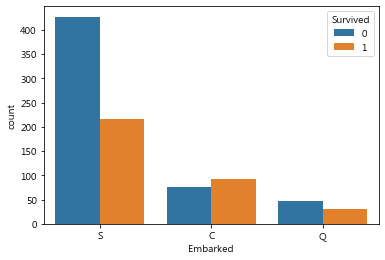

In [33]:
# 개수를 Y축으로 그래프 그림
sns.countplot(data=train, x='Embarked', hue='Survived')

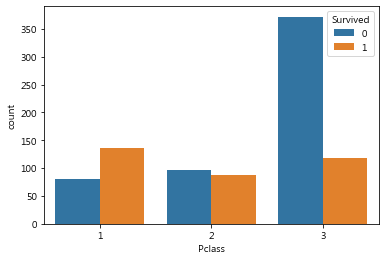

In [34]:
# 개수를 Y축으로 그래프 그림
sns.countplot(data=train, x='Pclass', hue='Survived')

value_count를 활용

In [18]:
s1=train.loc[train['Survived'] == 0, 'Pclass'].value_counts()
s2=train.loc[train['Survived'] == 1, 'Pclass'].value_counts()
print(s1)
print(s2)

3    372
2     97
1     80
Name: Pclass, dtype: int64
1    136
3    119
2     87
Name: Pclass, dtype: int64


In [19]:
df = pd.concat([s1, s2], axis=1)
df.columns.name = 'Survived'
df.columns = ['0', '1']
df

,0,1
1,80,136
2,97,87
3,372,119


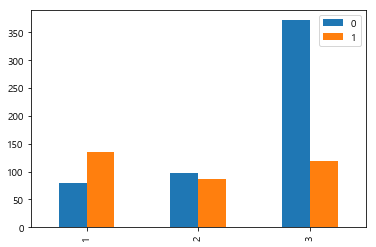

In [20]:
df.plot(kind='bar')

pivot을 활용

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


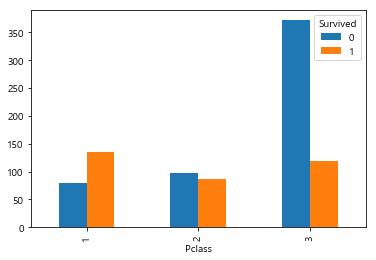

In [21]:
df = pd.pivot_table(train, index='Pclass', columns='Survived', values='Name', aggfunc=len)
df.plot(kind='bar')
df

### barplot, pointplot (평균 그래프)

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


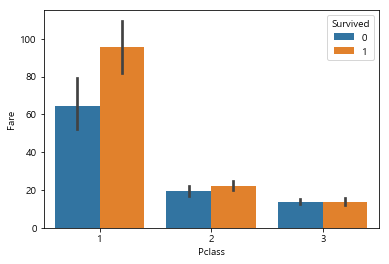

In [22]:
# y의 평균값과 분산을 그래프로 그림
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


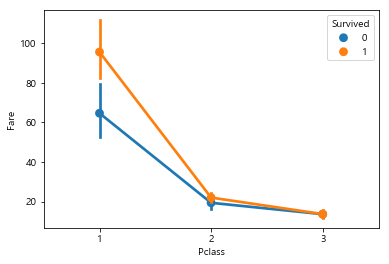

In [23]:
# barplt과 동일함
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

pivot을 활용하여 표시

In [24]:
df = train.pivot_table(index='Pclass', columns='Survived', values='Fare', aggfunc=[np.average])
df

average           
Survived          0          1
Pclass                        
1         64.684008  95.608029
2         19.412328  22.055700
3         13.669364  13.694887

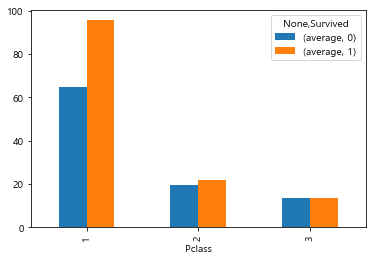

In [25]:
df.plot(kind='bar')

### distplot(분산, 챠트)

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


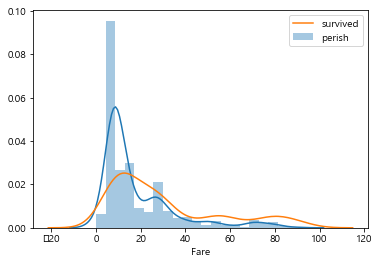

In [26]:
# 분산 챠트
low_fare = train[train['Fare'] < 100]

perish = low_fare[low_fare['Survived'] == 0]
survived = low_fare[low_fare['Survived'] == 1]

sns.distplot(perish['Fare'], hist=True, label='perish')
sns.distplot(survived['Fare'], hist=False, label='survived')

### lmplot (선점형, 산포 그래프)

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


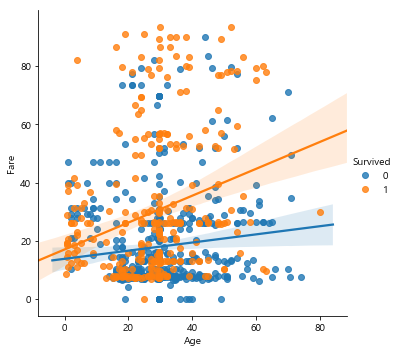

In [27]:
low_fare = train[train['Fare'] < 100]

sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived', fit_reg=True)

## - 지도 그리기

In [72]:
data = [[42.247835,-71.474357, 49], [42.274032,-71.423979, 4435], [42.282364,-71.364801, 13866], [42.297870,-71.284260, 7261], 
          [42.324830,-71.259660, 737], [42.345680,-71.215169, 6], [42.352089,-71.124947, 56], [42.351510,-71.086980, 128]]

df = pd.DataFrame(data, columns=['Lat', 'Long', 'Count'])
df.head()

,Lat,Long,Count
0,42.247835,-71.474357,49
1,42.274032,-71.423979,4435
2,42.282364,-71.364801,13866
3,42.297870,-71.284260,7261
4,42.324830,-71.259660,737


In [77]:
import folium
from folium.plugins import HeatMap

# tiles: OpenStreetMap, Stamen Toner
my_map = folium.Map(location=[42.324830,-71.259660], tiles = "OpenStreetMap", zoom_start = 11)
HeatMap(df, radius=20).add_to(my_map)

my_map

## - 복합챠트 그리기

In [28]:
import matplotlib.pyplot as plt

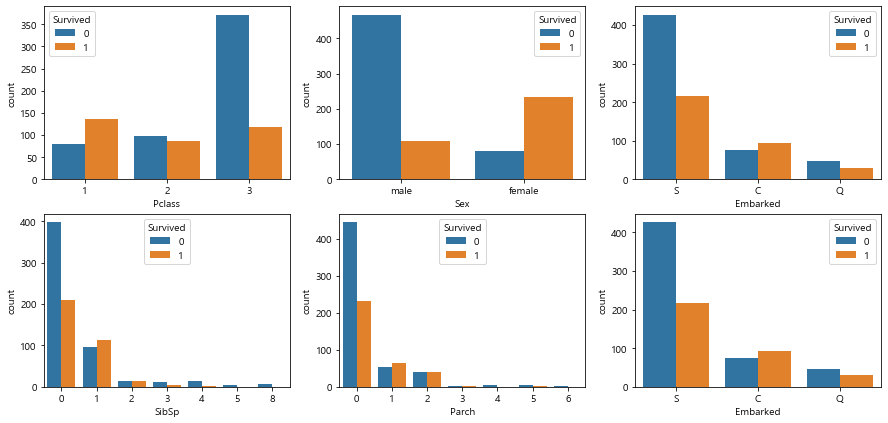

In [35]:
# 챠트의 객체 구조 : Figure > AxesSubplot > Axis 순서임
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
#figure.set_size_inches(15, 7)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax6)

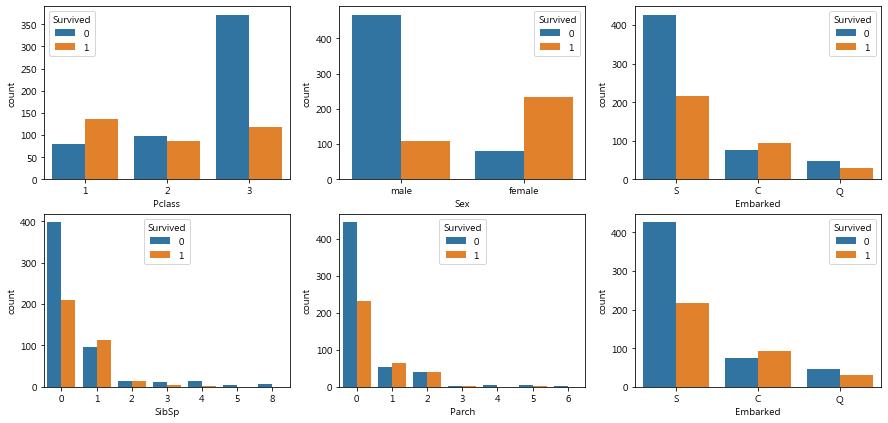

In [38]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax6)

plt.show()

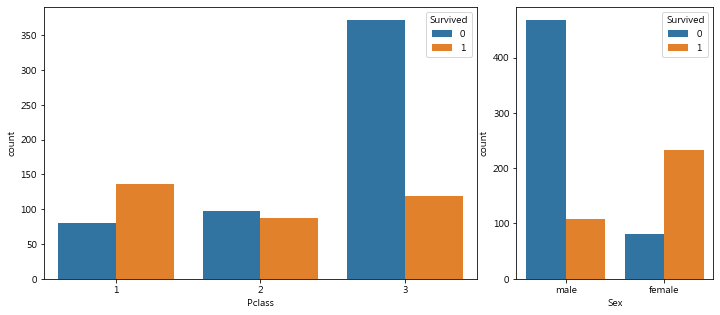

In [20]:
# 크기가 다른 챠트 그리기
# subplot2grid로 여러개의 셀을 병햡해서 생성함
fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot2grid((3,3), (0,0), rowspan=3, colspan=2)
ax2 = plt.subplot2grid((3,3), (0,2), rowspan=3, colspan=1)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)